In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore")


# Data Reading


In [141]:
train=pd.read_csv("train.csv")
train
train_original = train

In [142]:
test=pd.read_csv("test.csv")
test
test_original = test

In [143]:
train[train.duplicated()].shape

(0, 13)

In [144]:

test[test.duplicated()].shape

(0, 12)

# Univariate Analysis


# Categorical Variable


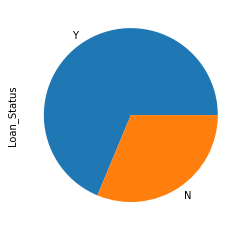

In [145]:
train.Loan_Status.value_counts().plot(kind="pie")

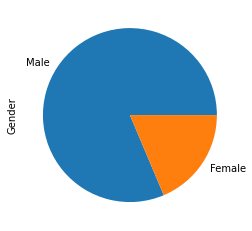

In [146]:
train.Gender.value_counts().plot(kind="pie")

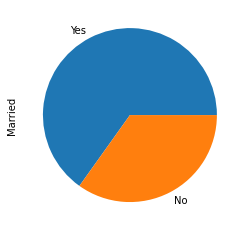

In [147]:
train.Married.value_counts().plot(kind="pie")

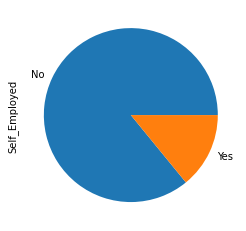

In [148]:
train.Self_Employed.value_counts().plot(kind="pie")

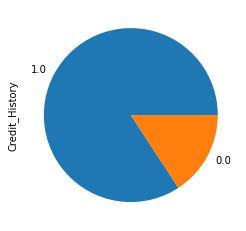

In [149]:
train.Credit_History.value_counts().plot(kind="pie")

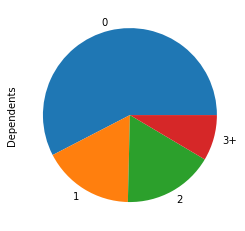

In [150]:
train.Dependents.value_counts().plot(kind="pie")

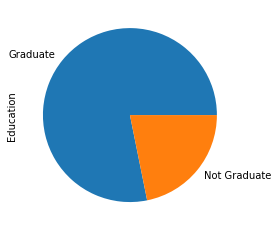

In [151]:
train.Education.value_counts().plot(kind="pie")

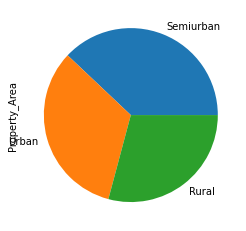

In [152]:
train.Property_Area.value_counts().plot(kind="pie")

# Numerical Variable

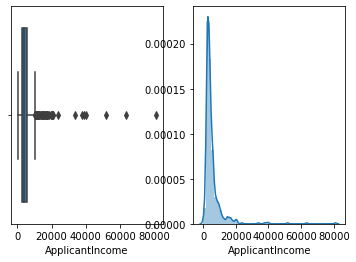

In [153]:
plt.figure(1)
plt.subplot(121)
sns.boxplot(train['ApplicantIncome'])
plt.subplot(122)
sns.distplot(train["ApplicantIncome"]);
plt.show() # Left skewed not normal distribution

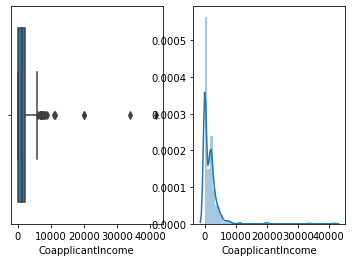

In [154]:
plt.figure(1)
plt.subplot(121)
sns.boxplot(train['CoapplicantIncome'])
plt.subplot(122)
sns.distplot(train["CoapplicantIncome"]);
plt.show() # Left skewed- not normal distribution

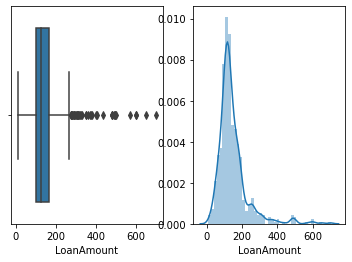

In [155]:
plt.figure(1)
plt.subplot(121)
sns.boxplot(train['LoanAmount'])
plt.subplot(122)
sns.distplot(train["LoanAmount"]);
plt.show() # normal distribution

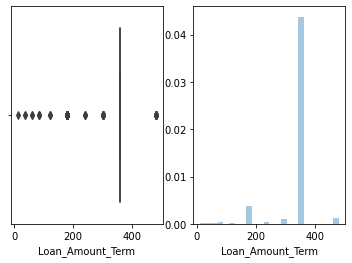

In [156]:
plt.figure(1)
plt.subplot(121)
sns.boxplot(train['Loan_Amount_Term'])
plt.subplot(122)
sns.distplot(train["Loan_Amount_Term"]);
plt.show() # normal distribution but it has many outliers

# Bivariate Analysis

# Categorical independent variable vs Target variable

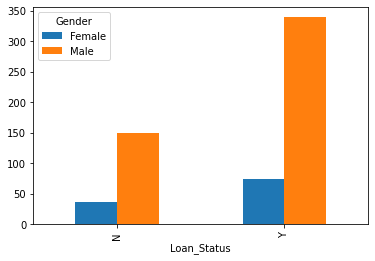

In [157]:
pd.crosstab(train.Loan_Status,train.Gender).plot(kind="bar")

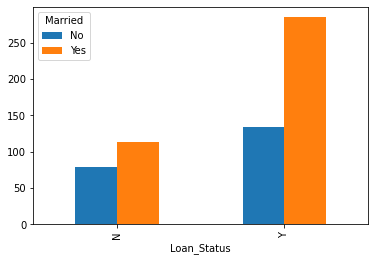

In [158]:
pd.crosstab(train.Loan_Status,train.Married).plot(kind="bar")
# married applicants is higher for the approved loans.

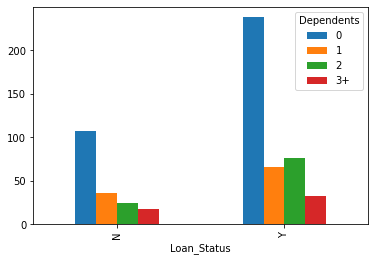

In [159]:
pd.crosstab(train.Loan_Status,train.Dependents).plot(kind="bar")

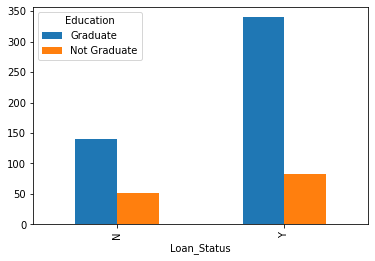

In [160]:
pd.crosstab(train.Loan_Status,train.Education).plot(kind="bar")
# Graduate applicants is higher for the approved loans.

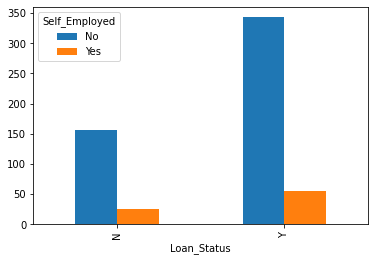

In [161]:
pd.crosstab(train.Loan_Status,train.Self_Employed).plot(kind="bar")

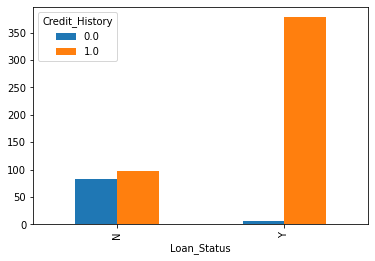

In [162]:
pd.crosstab(train.Loan_Status,train.Credit_History).plot(kind="bar")

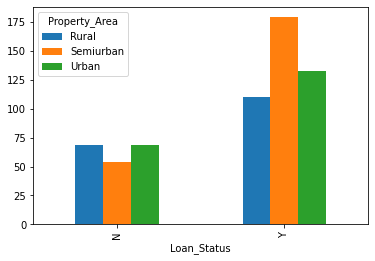

In [163]:
pd.crosstab(train.Loan_Status,train.Property_Area).plot(kind="bar")

# Numerical independent variable Vs Target Variable



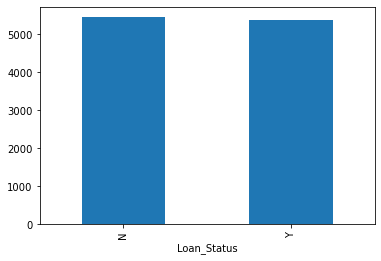

In [164]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

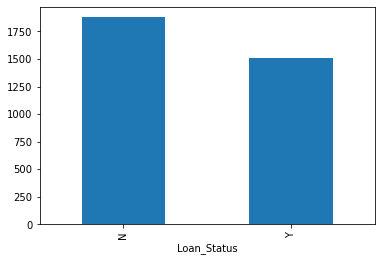

In [165]:
train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()

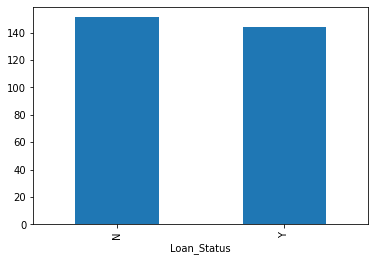

In [166]:
train.groupby('Loan_Status')['LoanAmount'].mean().plot.bar()

In [167]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

# Correlation

In [168]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


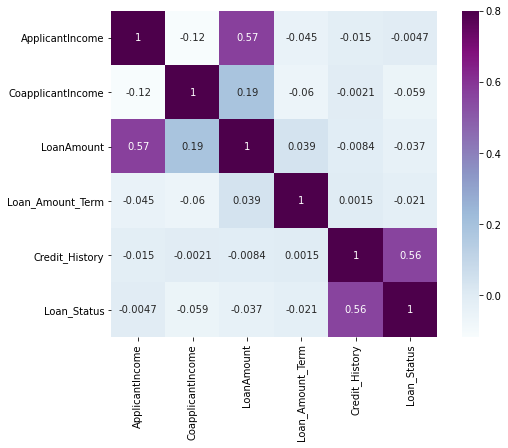

In [169]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

# Missing Value imputation

In [170]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [171]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [172]:
train['Credit_History'].fillna(train['Credit_History'].mode().iloc[0],inplace=True) 
test['Credit_History'].fillna(test['Credit_History'].mode().iloc[0],inplace=True) 

In [173]:
train['Gender'].fillna(train['Gender'].mode().iloc[0],inplace=True) 
test['Gender'].fillna(test['Gender'].mode().iloc[0],inplace=True)

In [174]:
train['Married'].fillna(train['Married'].mode().iloc[0],inplace=True) 
test['Married'].fillna(test['Married'].mode().iloc[0],inplace=True) 

In [175]:
train['Self_Employed'].fillna(train['Self_Employed'].mode().iloc[0],inplace=True) 
test['Self_Employed'].fillna(test['Self_Employed'].mode().iloc[0],inplace=True) 

In [176]:
train['Dependents'].fillna(train['Dependents'].mode().iloc[0],inplace=True) 
test['Dependents'].fillna(test['Dependents'].mode().iloc[0],inplace=True) 

In [177]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode().iloc[0],inplace=True) 
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode().iloc[0],inplace=True) 

In [178]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode().iloc[0],inplace=True) 
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode().iloc[0],inplace=True) 

In [179]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
train['LoanAmount']=imputer.fit_transform(train[['LoanAmount']]) 
test['LoanAmount']=imputer.fit_transform(test[['LoanAmount']])

In [180]:
train.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [181]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Outlier Treatment

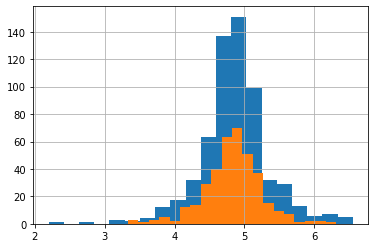

In [182]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)

# Skweness and kurtosis

In [183]:
from scipy.stats import skew
#creating data frame
df=pd.DataFrame(train)
print("The value of Skewness is:")
#calculating the skewness
print(df.skew())
print("*****************************")
print("The value of kurtosis is:")
#calculating the kurtosis
print(df.kurtosis())

The value of Skewness is:
Dependents           1.015551
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Loan_Status         -0.809998
LoanAmount_log      -0.223227
dtype: float64
*****************************
The value of kurtosis is:
Dependents           -0.347376
ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.896456
Loan_Amount_Term      6.924993
Credit_History        2.095179
Loan_Status          -1.348306
LoanAmount_log        2.799973
dtype: float64


In [184]:
#creating data frame
df=pd.DataFrame(test)
print("The value of Skewness is:")
#calculating the skewness
print(df.skew())
print("*****************************")
print("The value of kurtosis is:")
#calculating the kurtosis
print(df.kurtosis())

The value of Skewness is:
Dependents           0.938056
ApplicantIncome      8.441375
CoapplicantIncome    4.257357
LoanAmount           2.238688
Loan_Amount_Term    -2.709537
Credit_History      -1.854721
LoanAmount_log      -0.258871
dtype: float64
*****************************
The value of kurtosis is:
Dependents            -0.576900
ApplicantIncome      103.127490
CoapplicantIncome     30.191142
LoanAmount             9.577537
Loan_Amount_Term       8.866289
Credit_History         1.447852
LoanAmount_log         1.797574
dtype: float64


# Removing skewness by power transformation


Text(0.5, 1.0, 'Probplot against normal distribution (train data)')

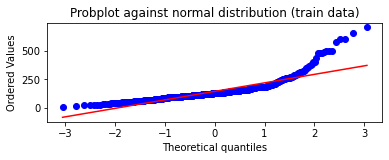

In [185]:
import scipy.stats as stats  
ax1 = plt.subplot(211)
stats.probplot(train['LoanAmount'], dist=stats.norm,plot=ax1)
ax1.set_title('Probplot against normal distribution (train data)')

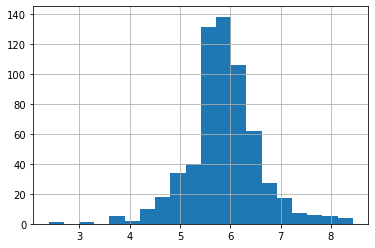

In [186]:
from scipy.stats import boxcox
train['LoanAmount_BC']=boxcox(train['LoanAmount'])[0]
train['LoanAmount_BC'].hist(bins=20)

Text(0.5, 1.0, 'Probplot after BoxCox Tranformation (train data)')

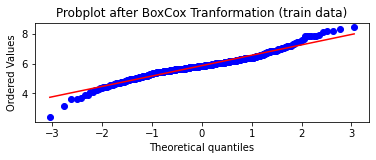

In [187]:
ax2 = plt.subplot(212)
stats.probplot(train['LoanAmount_BC'], dist=stats.norm,plot=ax2)
ax2.set_title('Probplot after BoxCox Tranformation (train data)')

Text(0.5, 1.0, 'Probplot against normal distribution (test data)')

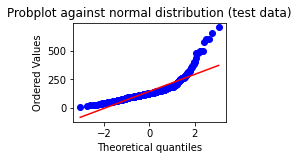

In [188]:
import scipy.stats as stats  
ax3 = plt.subplot(222)
stats.probplot(train['LoanAmount'], dist=stats.norm,plot=ax3)
ax3.set_title('Probplot against normal distribution (test data)')

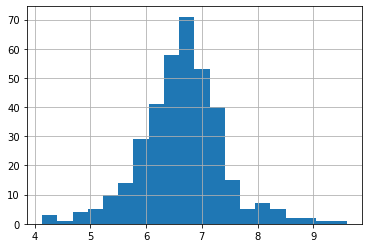

In [189]:
#*********************Test Data remove Skewness from LoanAmount *******************
test['LoanAmount_BC']=boxcox(test['LoanAmount'])[0]
test['LoanAmount_BC'].hist(bins=20)

Text(0.5, 1.0, 'Probplot after BoxCox Tranformation (test data)')

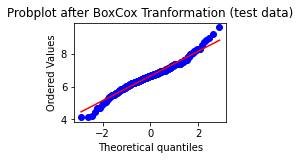

In [190]:
from scipy.stats import boxcox
ax4 = plt.subplot(223)
stats.probplot(test['LoanAmount_BC'], dist=stats.norm,plot=ax4)
ax4.set_title('Probplot after BoxCox Tranformation (test data)')

In [191]:
print(df.skew())

Dependents           0.938056
ApplicantIncome      8.441375
CoapplicantIncome    4.257357
LoanAmount           2.238688
Loan_Amount_Term    -2.709537
Credit_History      -1.854721
LoanAmount_log      -0.258871
dtype: float64


# Feature Engineering

In [192]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

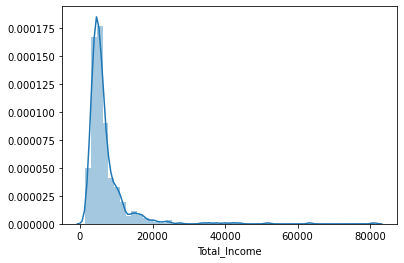

In [193]:
sns.distplot(train['Total_Income'])

In [194]:
#the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let’s create the EMI feature now.
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

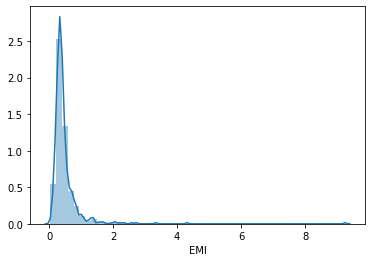

In [195]:
sns.distplot(train['EMI'])

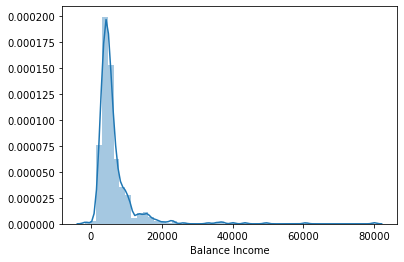

In [196]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

# SMOTE

In [197]:
train['Loan_Status'].value_counts() #loan_status 1 is high

1    422
0    192
Name: Loan_Status, dtype: int64

In [198]:
train_1=train[train.Loan_Status==1]
train_0=train[train.Loan_Status==0]

In [199]:
from sklearn.utils import resample
train_new=resample(train_0,replace=True,n_samples=422,random_state=123)

In [200]:
train=pd.concat([train_new,train_1])
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,LoanAmount_BC,Total_Income,EMI,Balance Income
357,LP002151,Male,Yes,1,Graduate,No,3875,0.0,67.0,360.0,1.0,Urban,0,4.204693,4.935152,3875.0,0.186111,3688.888889
409,LP002317,Male,Yes,3,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,0,5.886104,7.382394,81000.0,1.000000,80000.000000
199,LP001673,Male,No,0,Graduate,Yes,11000,0.0,83.0,360.0,1.0,Urban,0,4.418841,5.230123,11000.0,0.230556,10769.444444
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,0,6.173786,7.832583,20233.0,1.333333,18899.666667
48,LP001146,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,0,4.787492,5.749027,6085.0,0.333333,5751.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,1,4.682131,5.599272,5182.0,0.300000,4882.000000
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,4.262680,5.014562,2900.0,0.197222,2702.777778
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,3.688879,4.243627,4106.0,0.222222,3883.777778
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,5.533389,6.843402,8312.0,0.702778,7609.222222


In [201]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,LoanAmount_BC,Total_Income,EMI,Balance Income
357,LP002151,Male,Yes,1,Graduate,No,3875,0.0,67.0,360.0,1.0,Urban,0,4.204693,4.935152,3875.0,0.186111,3688.888889
409,LP002317,Male,Yes,3,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,0,5.886104,7.382394,81000.0,1.000000,80000.000000
199,LP001673,Male,No,0,Graduate,Yes,11000,0.0,83.0,360.0,1.0,Urban,0,4.418841,5.230123,11000.0,0.230556,10769.444444
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,0,6.173786,7.832583,20233.0,1.333333,18899.666667
48,LP001146,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,0,4.787492,5.749027,6085.0,0.333333,5751.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,1,4.682131,5.599272,5182.0,0.300000,4882.000000
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,4.262680,5.014562,2900.0,0.197222,2702.777778
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,3.688879,4.243627,4106.0,0.222222,3883.777778
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,5.533389,6.843402,8312.0,0.702778,7609.222222


In [202]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,LoanAmount_BC,Total_Income,EMI,Balance Income
count,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000
mean,5722.609005,1720.741611,149.547201,341.744076,0.792654,0.500000,4.884211,5.900463,7443.350616,0.488439,6954.911747
std,7728.313707,3454.610534,84.452246,67.600606,0.405646,0.500296,0.492671,0.707955,8117.368655,0.491231,7955.357145
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,2.197225,2.386645,1442.000000,0.025000,-1768.000000
25%,2786.500000,0.000000,102.750000,360.000000,1.000000,0.000000,4.632290,5.528837,4234.000000,0.290972,3807.888889
50%,3750.000000,1301.000000,131.000000,360.000000,1.000000,0.500000,4.875197,5.874586,5416.500000,0.377778,4994.277778
75%,5819.500000,2312.000000,170.000000,360.000000,1.000000,1.000000,5.135798,6.252521,7550.250000,0.519444,7049.113551
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,6.551080,8.437772,81000.000000,9.250000,80000.000000


In [203]:
train=train.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','LoanAmount_log','LoanAmount_BC'],axis=1)
test=test.drop('Loan_ID',axis=1)

In [204]:
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','LoanAmount_log','LoanAmount_BC'],axis=1)

In [205]:
train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Balance Income
357,Male,Yes,1,Graduate,No,1.0,Urban,0,3875.0,0.186111,3688.888889
409,Male,Yes,3,Graduate,No,0.0,Rural,0,81000.0,1.000000,80000.000000
199,Male,No,0,Graduate,Yes,1.0,Urban,0,11000.0,0.230556,10769.444444
308,Male,No,0,Graduate,No,1.0,Rural,0,20233.0,1.333333,18899.666667
48,Female,Yes,0,Graduate,No,0.0,Urban,0,6085.0,0.333333,5751.666667
...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,1.0,Rural,1,5182.0,0.300000,4882.000000
609,Female,No,0,Graduate,No,1.0,Rural,1,2900.0,0.197222,2702.777778
610,Male,Yes,3,Graduate,No,1.0,Rural,1,4106.0,0.222222,3883.777778
611,Male,Yes,1,Graduate,No,1.0,Urban,1,8312.0,0.702778,7609.222222


In [206]:
test

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Total_Income,EMI,Balance Income
0,Male,Yes,0,Graduate,No,1.0,Urban,5720,0.305556,5414.444444
1,Male,Yes,1,Graduate,No,1.0,Urban,4576,0.350000,4226.000000
2,Male,Yes,2,Graduate,No,1.0,Urban,6800,0.577778,6222.222222
3,Male,Yes,2,Graduate,No,1.0,Urban,4886,0.277778,4608.222222
4,Male,No,0,Not Graduate,No,1.0,Urban,3276,0.216667,3059.333333
...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3,Not Graduate,Yes,1.0,Urban,5786,0.313889,5472.111111
363,Male,Yes,0,Graduate,No,1.0,Urban,4867,0.319444,4547.555556
364,Male,No,0,Graduate,No,1.0,Semiurban,5243,0.350000,4893.000000
365,Male,Yes,0,Graduate,No,1.0,Rural,7393,0.438889,6954.111111


In [207]:

train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [208]:
train

,Credit_History,Loan_Status,Total_Income,EMI,Balance Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
357,1.0,0,3875.0,0.186111,3688.888889,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
409,0.0,0,81000.0,1.000000,80000.000000,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
199,1.0,0,11000.0,0.230556,10769.444444,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1
308,1.0,0,20233.0,1.333333,18899.666667,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0
48,0.0,0,6085.0,0.333333,5751.666667,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,1.0,1,5182.0,0.300000,4882.000000,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
609,1.0,1,2900.0,0.197222,2702.777778,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0
610,1.0,1,4106.0,0.222222,3883.777778,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
611,1.0,1,8312.0,0.702778,7609.222222,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [211]:
train['Loan_Status'].value_counts() #loan_status 1 is high

1    422
0    422
Name: Loan_Status, dtype: int64

# Model Building

# Logistic Regression

In [212]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn import linear_model

In [213]:
x = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

import logging as log

In [214]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
 print ('\n{} of kfold {}'.format(i,kf.n_splits))
 xtr,xvl = x.values[train_index], x.values[test_index]
 ytr, yvl = y.values[train_index], y.values[test_index]
 LRmodel = linear_model.LogisticRegression(random_state=1)
 LRmodel.fit(xtr,ytr)
 pred_test=LRmodel.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 l3 = log_loss(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test=LRmodel.predict(xvl)
 pred = LRmodel.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))
print("Log_loss: %f" % l3)

 


1 of kfold 10
accuracy_score 0.6941176470588235

2 of kfold 10
accuracy_score 0.5058823529411764

3 of kfold 10
accuracy_score 0.6941176470588235

4 of kfold 10
accuracy_score 0.6470588235294118

5 of kfold 10
accuracy_score 0.6547619047619048

6 of kfold 10
accuracy_score 0.7142857142857143

7 of kfold 10
accuracy_score 0.5

8 of kfold 10
accuracy_score 0.5

9 of kfold 10
accuracy_score 0.44047619047619047

10 of kfold 10
accuracy_score 0.6904761904761905

 Mean Validation Accuracy 0.6041176470588235
Log_loss: 10.690774


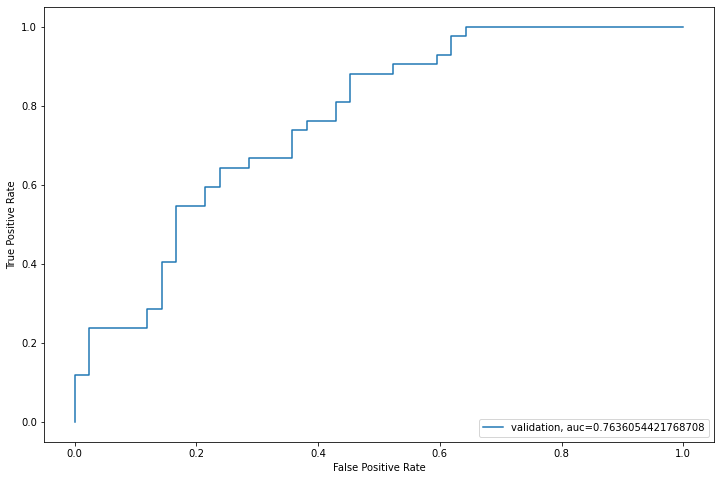

0.7636054421768708


In [215]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()
print(auc)

In [216]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
LRmodel = ExtraTreesRegressor()
LRmodel.fit(x,y)

ExtraTreesRegressor()

In [217]:

print(LRmodel.feature_importances_)

[0.22140508 0.16305875 0.17611891 0.16793286 0.01465278 0.01435582
 0.01122826 0.01003874 0.0158559  0.03406867 0.01773984 0.01888368
 0.0219753  0.02307535 0.01355932 0.01514785 0.02400844 0.019041
 0.01785346]


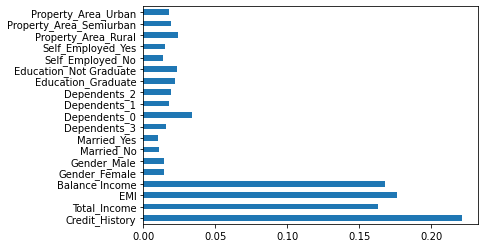

In [218]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(LRmodel.feature_importances_, index=x.columns)
feat_importances.plot(kind='barh')
plt.show()

In [219]:
cm = confusion_matrix(yvl, pred_test)
print(cm)

[[21 21]
 [ 5 37]]


# Decision Tree

In [220]:
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = x.values[train_index],x.values[test_index]
    ytr,yvl = y.values[train_index],y.values[test_index]
    DTmodel = tree.DecisionTreeClassifier(random_state=1)
    DTmodel.fit(xtr,ytr)
    pred_test=DTmodel.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    l2 = log_loss(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = DTmodel.predict(test)
    pred = DTmodel.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))
print("Log_loss: %f" % l2)
print(model)


1 of kfold 10 
accuracy_score 0.8235294117647058

2 of kfold 10 
accuracy_score 0.8705882352941177

3 of kfold 10 
accuracy_score 0.9176470588235294

4 of kfold 10 
accuracy_score 0.8588235294117647

5 of kfold 10 
accuracy_score 0.8928571428571429

6 of kfold 10 
accuracy_score 0.8809523809523809

7 of kfold 10 
accuracy_score 0.8333333333333334

8 of kfold 10 
accuracy_score 0.8333333333333334

9 of kfold 10 
accuracy_score 0.9523809523809523

10 of kfold 10 
accuracy_score 0.8690476190476191

 Mean Validation Accuracy 0.8732492997198879
Log_loss: 4.522973


NameError: name 'model' is not defined

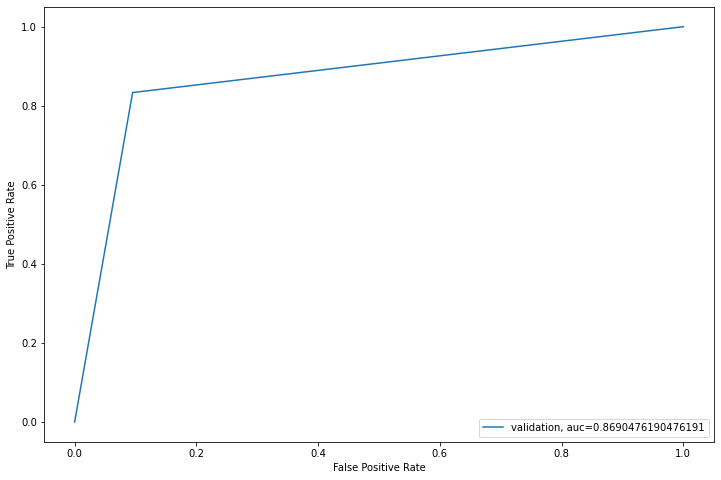

0.8690476190476191


In [221]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()
print(auc)

# Random Forest

In [222]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = x.values[train_index],x.values[test_index]
 ytr,yvl = y.values[train_index],y.values[test_index]
 rf_model = RandomForestClassifier(random_state=1, max_depth=10)
 rf_model.fit(xtr,ytr)
 pred_test =rf_model.predict(xvl)
 l4 = log_loss(yvl,pred_test)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = rf_model.predict(test)
 pred = rf_model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))
print("Log_loss: %f" %l4)
print(rf_model)


1 of kfold 10 
accuracy_score 0.8

2 of kfold 10 
accuracy_score 0.8588235294117647

3 of kfold 10 
accuracy_score 0.8823529411764706

4 of kfold 10 
accuracy_score 0.8941176470588236

5 of kfold 10 
accuracy_score 0.9166666666666666

6 of kfold 10 
accuracy_score 0.9047619047619048

7 of kfold 10 
accuracy_score 0.8809523809523809

8 of kfold 10 
accuracy_score 0.8333333333333334

9 of kfold 10 
accuracy_score 0.9404761904761905

10 of kfold 10 
accuracy_score 0.8452380952380952

 Mean Validation Accuracy 0.875672268907563
Log_loss: 5.345363
RandomForestClassifier(max_depth=10, random_state=1)


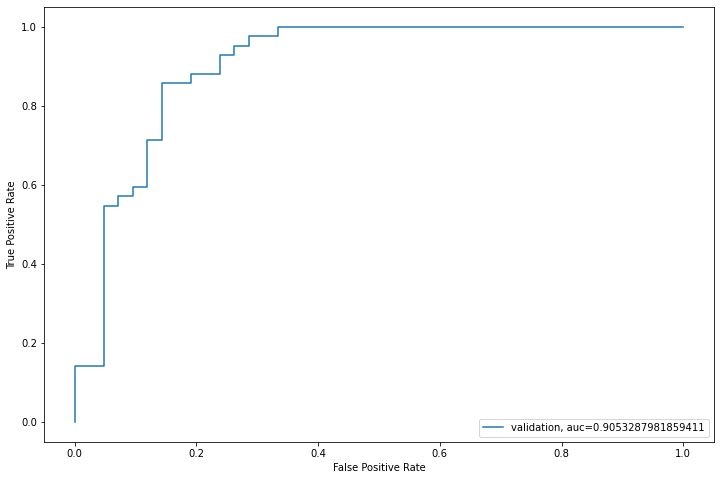

0.9053287981859411


In [223]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()
print(auc)

# XGBOOST

In [224]:
from xgboost import XGBClassifier


In [226]:

from xgboost import XGBClassifier
i=1 
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y): 
 print('\n{} of kfold {}'.format(i,kf.n_splits)) 
 xtr,xvl = x.values[train_index],x.values[test_index] 
 ytr,yvl = y.values[train_index],y.values[test_index] 
 xgb_model = XGBClassifier(n_estimators=50, max_depth=4,eval_metric="logloss") 
 xgb_model.fit(xtr, ytr) 
 pred_test = xgb_model.predict(xvl) 

 score = accuracy_score(yvl,pred_test) 
 l5= log_loss(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 


print ('\n Mean Validation Accuracy',mean/(i-1))
print("Log_loss: %f" %l5)
print(xgb_model)


1 of kfold 5
accuracy_score 0.8284023668639053

2 of kfold 5
accuracy_score 0.8106508875739645

3 of kfold 5
accuracy_score 0.863905325443787

4 of kfold 5
accuracy_score 0.8165680473372781

5 of kfold 5
accuracy_score 0.875

 Mean Validation Accuracy 0.838905325443787
Log_loss: 4.317395
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


# Important Feature

[0.22140508 0.16195497 0.17945228 0.16408559 0.01398647 0.01434203
 0.00900018 0.01257127 0.01587878 0.03269031 0.01993187 0.01799924
 0.02208665 0.02217748 0.01451383 0.01465269 0.02394561 0.01930552
 0.02002013]


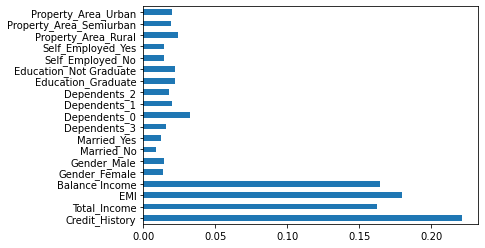

In [227]:
DTmodel = ExtraTreesRegressor()
DTmodel.fit(x,y)

print(DTmodel.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(DTmodel.feature_importances_, index=x.columns)
feat_importances.plot(kind='barh')
plt.show()

# Model Evaluation

In [228]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score

In [229]:
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('DecTree', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier(random_state=1, max_depth=10)),
          ('XGBOOST', XGBClassifier(n_estimators=50, max_depth=4,eval_metric="logloss"))]

In [230]:
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=None)
    results = model_selection.cross_val_score(model, x, y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

LogReg| Mean=0.555644 STD=0.203065
DecTree| Mean=0.842087 STD=0.087929
RF| Mean=0.812927 STD=0.037820
XGBOOST| Mean=0.812829 STD=0.038059


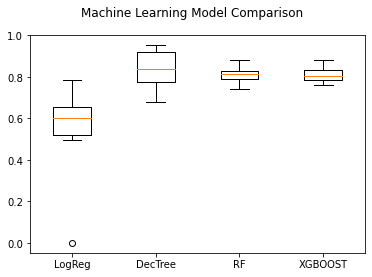

In [231]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()

# Deployment

In [233]:

import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_model, file)